In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('C:\\Desafio Cientista de Dados - Indicium\\Dados\\Processados\\manutencao_preventiva_treino_proc.csv')
df

,type,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min,failure_type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.2,308.7,1408,40.0,9,No Failure
3,M,298.1,308.6,1425,41.9,11,No Failure
4,L,298.1,308.6,1558,42.4,14,No Failure
...,...,...,...,...,...,...,...
6662,L,298.8,308.3,1634,27.9,12,No Failure
6663,M,298.8,308.4,1604,29.5,14,No Failure
6664,H,298.9,308.4,1632,31.8,17,No Failure
6665,H,299.0,308.7,1408,48.5,25,No Failure


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   6667 non-null   object 
 1   air_temperature_k      6667 non-null   float64
 2   process_temperature_k  6667 non-null   float64
 3   rotational_speed_rpm   6667 non-null   int64  
 4   torque_nm              6667 non-null   float64
 5   tool_wear_min          6667 non-null   int64  
 6   failure_type           6667 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 364.7+ KB


In [4]:
sns.set_style('darkgrid')
#sns.set_palette('Set1')

**Overview estatístico da base de dados**

In [5]:
df.describe()

,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
count,6667.000000,6667.000000,6667.000000,6667.000000,6667.000000
mean,299.992515,309.992620,1537.419529,40.058512,108.098095
std,1.994710,1.488101,177.182908,9.950804,63.359915
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1422.500000,33.200000,54.000000
50%,300.000000,310.000000,1503.000000,40.200000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,251.000000


**Calculando a taxa de máquinas que apresentaram alguma falha**

In [6]:
taxa_falha = df.failure_type.value_counts() / len(df)
taxa_falha

No Failure                  0.965202
Heat Dissipation Failure    0.011249
Power Failure               0.009450
Overstrain Failure          0.007800
Tool Wear Failure           0.004500
Random Failures             0.001800
Name: failure_type, dtype: float64

- Máquinas sem falhas - 96,52%
- Máquinas com algum tipo de falha - 3,48%

In [7]:
falhas = df.groupby('failure_type')
falhas.mean()

C:\Users\Joao\AppData\Local\Temp\ipykernel_9264\281260128.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  falhas.mean()


,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
failure_type,,,,,
Heat Dissipation Failure,302.550667,310.776000,1338.946667,52.493333,110.773333
No Failure,299.961756,309.981943,1539.159751,39.693986,106.737840
Overstrain Failure,299.955769,310.073077,1358.557692,56.336538,209.865385
Power Failure,299.888889,309.873016,1712.857143,51.080952,106.587302
Random Failures,300.691667,310.691667,1492.416667,43.608333,118.583333
Tool Wear Failure,300.196667,310.156667,1619.933333,34.380000,215.766667


C:\Users\Joao\AppData\Local\Temp\ipykernel_9264\2080230043.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacao = df.corr()


,air_temperature_k,process_temperature_k,rotational_speed_rpm,torque_nm,tool_wear_min
air_temperature_k,1.000000,0.875724,0.035903,-0.023257,0.021078
process_temperature_k,0.875724,1.000000,0.033379,-0.024457,0.020298
rotational_speed_rpm,0.035903,0.033379,1.000000,-0.875989,-0.001290
torque_nm,-0.023257,-0.024457,-0.875989,1.000000,-0.004343
tool_wear_min,0.021078,0.020298,-0.001290,-0.004343,1.000000


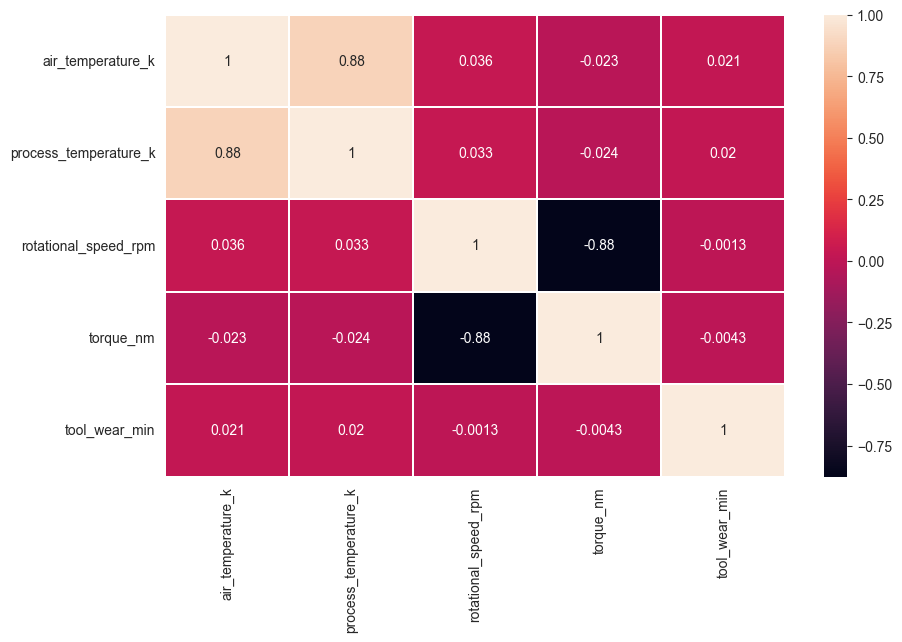

In [8]:
correlacao = df.corr()
plt.figure(figsize = (10, 6))
sns.heatmap(correlacao, annot = True, linewidths = '.25')
correlacao

**Atributos com uma alta correlação positiva:**
    - Process_temperature_k - air_temperature_k = 0.88
    
**Atributos com correlação negativa:**
    - torque_nm	 - rotational_speed_rmp

In [17]:
fig = px.histogram(df.query("failure_type!= 'No Failure'"), x="failure_type", color='failure_type',barmode="group", template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Tipos de Falhas")
fig.show()

 **Falhas mais comuns**
 - As falhas mais comuns de ocorrer são por falha de energia, falha no overstrain e falha de dissipação de calor

In [10]:
fig = px.histogram(df, y="type", template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Tipo de Produto" )
fig.show()

fig1 = px.histogram(df.query("failure_type!= 'No Failure'"), x="type", color='failure_type',barmode="group", template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Tipo de Produto Vs Tipo de Falha")
fig1.show()

- A maioria dos máquinas é do tipo "L"
- A maioria das falhas do tipo "Overstrain Failure", ocorreram nas máquinas do tipo "L"
- A maioria das falhas do tipo "Heat Dissipation Failure", ocorreram nas máquinas do tipo "L"
- A maioria das falhas do tipo "Tool Wear Failure", ocorreram nas máquinas do tipo "L"
- No tipo "L" e tipo "H", ocorreu uma falha do tipo "Overstrain Failure"

In [11]:
fig = px.histogram(df.query("failure_type!= 'No Failure'"), x="rotational_speed_rpm", color='failure_type',barmode="group", template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Rotações por minuto Vs Tipo de Falha")
fig.show()

- Falhas do tipo "Heat Dissipation Failure" ocorreram em máquinas com rotação entre 1200 - 1400 rotações por minuto
- Falhas do tipo "Overstrain Failure" ocorreram em máquinas com rotação entre 1100 - 1600 rotações por minuto
- Falhas do tipo "Power Failure" ocorreram em máquinas com rotação entre 1200 - 1499 e 2200 - 2899 rotações por minuto
- Falhas do tipo "Random Failure" ocorreram em máquinas com rotação entre 1300 - 1699 rotações por minuto
- Falhas do tipo "Tool Wear Failure" ocorreram em máquinas com rotação entre 1300 - 2299 rotações por minuto

In [12]:
fig = px.histogram(df, x="torque_nm", color='failure_type',barmode="group",template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Torque Vs Tipo de Falha")
fig.show()

fig1 = px.histogram(df.query("failure_type!= 'No Failure'"), x="torque_nm", color='failure_type',barmode="group", template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Torque Vs Tipo de Falha")
fig1.show()


 **Torque Vs Tipo de Falha**
 - Temos uma distribuição normal nos valores de Torque
 - Grande parte das falhas ocorreram com o torque acima dos 40
 - Falhas por dicipação de calor ocorreram com torque entre 40 - 69
 - Falhas do tipo "Overstrain Failure", ocorreram com torque entre 45 - 69
 - Falhas do tipo "Tool Wear Failure", ocorreram com torque entre 15 - 45

In [19]:
fig = px.scatter(df.query("failure_type!= 'No Failure'"), x="rotational_speed_rpm", y="torque_nm", color='failure_type',title='Torque Vs Rotação por minuto', template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()


- Grande parte das falhas ocorrem quando o torque está acima dos 40 e a velocidade está abaixo dos 1.600 rotações por minuto.
- Falhas do tipo "Power Failure" ocorreram quando o toque estava acima dos 55 e a velocidade de rotação estava abaixo dos 1.500 por minuto. E também ocorreram quando o torque estava abaixos dos 15 e acima dos 2.200 rotações por minuto


In [20]:
fig = px.scatter(df.query("failure_type!= 'No Failure'"), x="air_temperature_k", y="process_temperature_k", color='failure_type',title='Temperatura do Processo Vs Temperatura do ar', template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

- Falhas por problemas de dissipação de calor se concentra quando a temperatura do ar fica acima dos 301.000, e a temperatura do processo está acima dos 309.000. 

In [15]:
fig1 = px.histogram(df.query("failure_type!= 'No Failure'"), x="tool_wear_min", color='failure_type',barmode="group", template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title="Torque Vs Tipo de Falha")
fig1.show()

- Falhas do tipo "Overstrain Failure" implicam entre 180 - 250 minuto de desgaste.
- Falhas do tipo "Tool Wear Failure" implicam entre 200 - 240 minuto de desgaste.

In [18]:
fig = px.histogram(df.query("failure_type!= 'No Failure'"), y="tool_wear_min", x='type', color='failure_type', template='ggplot2', color_discrete_sequence=px.colors.qualitative.G10, title='Tipos de máquinas Vs Desgaste por minutos')
fig.show()

- Máquinas do tipo "L" ocorrem mais desgaste por falhas de "Overstrain Failure", "Power Failure" e "Tool Wear Failure". Povavelmente máquinas do tipo "L" precisam realizar manutenções com maior frequência.